In [104]:
%matplotlib inline
%run Pipeline//upload_and_vizualize 
%run Pipeline//classify_and_evaluate 
%run Pipeline//aux
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pylab as pl
import seaborn as sn

pd.set_option('max_columns',100)

In [193]:
df_violations = read_file('data/ICIS-AIR_downloads/ICIS-AIR_VIOLATION_HISTORY.csv')

In [71]:
def get_groupby_counts(df, col_name):
    tot_count = df[col_name].count()
    count_per_group = df[col_name].value_counts().to_frame()
    count_per_group['Proportion'] = count_per_group[col_name] / tot_count
    
    count_per_count = count_per_group[col_name].value_counts().to_frame()
    count_per_count['Proportion'] = count_per_count[col_name] / count_per_count[col_name].sum()
    return tot_count, count_per_group, count_per_count

In [72]:
tot_count_viol, count_per_group_viol,  count_per_count_viol = get_groupby_counts(df_violations, 'STATE_CODE')

In [73]:
df_violations.head(1)

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,NaN,05-28-1996,10-15-1996


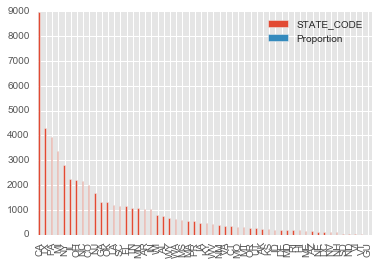

In [74]:
count_per_group_viol.plot(kind='bar')

In [194]:
df_violations_frv = df_violations.dropna(subset=['EARLIEST_FRV_DETERM_DATE']).drop(['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE'], axis=1)
df_violations_hpv = df_violations.dropna(subset=['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE']).drop('EARLIEST_FRV_DETERM_DATE',axis=1)

date_types = ['year','month']
date_format ='%m-%d-%Y'
frv_atts = ['EARLIEST_FRV_DETERM_DATE']
get_occupied_frame(df_violations_frv, frv_atts ,date_format, date_types)

hpv_atts = ['HPV_DAYZERO_DATE','HPV_RESOLVED_DATE']
get_occupied_frame(df_violations_hpv, hpv_atts,date_format, date_types)

['year', 'month']
['year', 'month']


In [195]:
# DAYS TO RESOLVE 

#df_violations_hpv = df_violations.dropna(subset=['HPV_RESOLVED_DATE_datetime','HPV_DAYZERO_DATE_datetime'])
df_violations_hpv['DAYS_TO_RESOLVE'] = pd.to_datetime(df_violations_hpv['HPV_RESOLVED_DATE_datetime']).sub(pd.to_datetime(df_violations_no_date_na['HPV_DAYZERO_DATE_datetime']))
df_violations_hpv['DAYS_TO_RESOLVE_INT'] = df_violations_hpv.DAYS_TO_RESOLVE.apply(day_to_int)

In [264]:
print('total_count_dayzero: ',len(df_violations.HPV_DAYZERO_DATE.dropna()),' total_count_resolved: ',len(df_violations.HPV_RESOLVED_DATE.dropna()))

total_count_dayzero:  35469  total_count_resolved:  41728


In [113]:
#df_violations_dateinfo = pd.concat([df_violations,df_violations_hpv_date_info], join='outer')

In [196]:
df_violations_frv = df_violations_frv[df_violations_frv.EARLIEST_FRV_DETERM_DATE_year > '1970']

In [101]:
df_violations_hpv.head(1)

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_year,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_year,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_year,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,05-28-1996,10-15-1996,NaN,NaN,1996-05-28,1996,May,05,1996-10-15,1996,October,10


/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


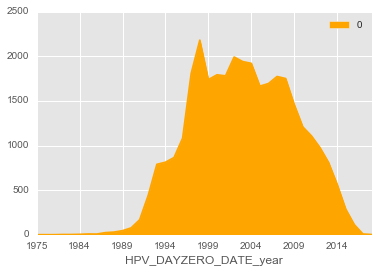

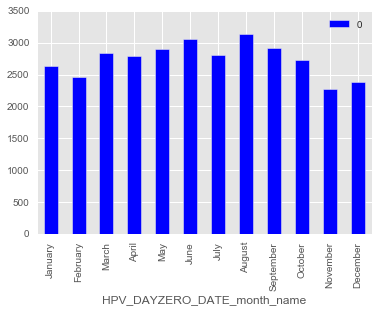

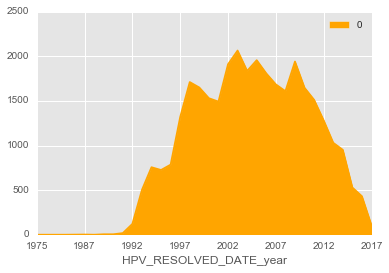

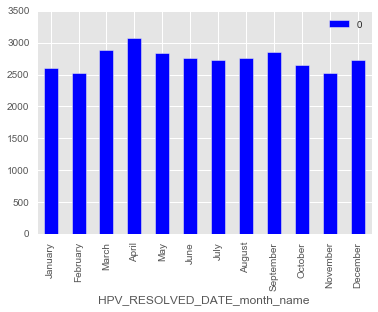

In [119]:
create_date_charts(df_violations_hpv, date_types, hpv_atts)

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


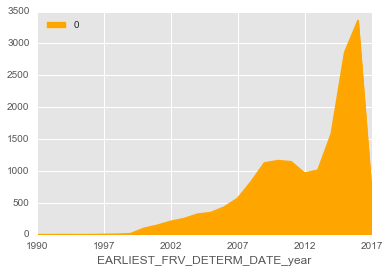

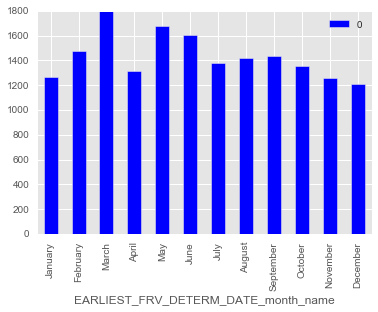

In [178]:
create_date_charts(df_violations_frv, date_types, frv_atts)

In [197]:
hpv_years = pd.get_dummies(df_violations_hpv.HPV_DAYZERO_DATE_year, prefix = 'HPV_')
frv_years = pd.get_dummies(df_violations_frv.EARLIEST_FRV_DETERM_DATE_year, prefix = 'FRV_')

In [198]:
frv_years.head(5)

,FRV__1990,FRV__1991,FRV__1992,FRV__1994,FRV__1995,FRV__1997,FRV__1998,FRV__1999,FRV__2000,FRV__2001,FRV__2002,FRV__2003,FRV__2004,FRV__2005,FRV__2006,FRV__2007,FRV__2008,FRV__2009,FRV__2010,FRV__2011,FRV__2012,FRV__2013,FRV__2014,FRV__2015,FRV__2016,FRV__2017
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
def day_to_int(series_row):
    return int(str(series_row).split()[0])
df_violations_hpv['DAYS_TO_RESOLVE_INT'] = df_violations_hpv.DAYS_TO_RESOLVE.apply(day_to_int)

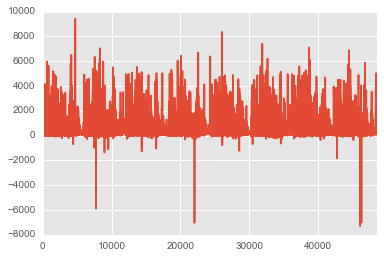

In [200]:
df_violations_hpv.DAYS_TO_RESOLVE_INT.plot()

In [209]:
emissions = read_file('data/POLL_RPT_COMBINED_EMISSIONS.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [271]:
emissions.head()

,REPORTING_YEAR,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,POLLUTANT_NAME,ANNUAL_EMISSION,UNIT_OF_MEASURE,NEI_TYPE,NEI_HAP_VOC_FLAG
0,2006,110002481430,TRIS,06095TRBTC651DA,Copper,63.30,Pounds,NaN,NaN
1,2006,110000410975,TRIS,49443SNCHM4925E,Barium compounds -- TRI,0.00,Pounds,NaN,NaN
2,2006,110000410975,TRIS,49443SNCHM4925E,Lead compounds,0.12,Pounds,NaN,NaN
3,2006,110000410975,TRIS,49443SNCHM4925E,Mercury,0.01,Pounds,NaN,NaN
4,2006,110000416540,TRIS,53051RBCRPN92W1,Toluene,1164.00,Pounds,NaN,NaN


In [273]:
cross_vectors(emissions, 'POLLUTANT_NAME', 'ANNUAL_EMISSION')


ANNUAL_EMISSION,-12989.16,-9918.0,-1362.25,0.0,1.53e-19,4.46e-19,5.29e-19,5.35e-19,5.71e-19,6.67e-19,...,47717646000.0,47838144000.0,48267882000.0,48275542000.0,48762720000.0,49789704000.0,50266808000.0,50596998000.0,53087208000.0,54462174000.0
POLLUTANT_NAME,,,,,,,,,,,,,,,,,,,,,
.alpha.-Hexachlorocyclohexane,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,1,2-Tetrachloroethane",0,0,0,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,1-Trichloroethane",0,0,0,669,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,2,2-Tetrachloroethane",0,0,0,253,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1,2-Trichloroethane",0,0,0,170,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1-Dichloroethane",0,0,0,162,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1-Dichloroethylene",0,0,0,68,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,1-Dimethylhydrazine",0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"1,2,3,4,5,6-Hexachlorocyclohexane",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
emissions[['POLLUTANT_NAME','ANNUAL_EMISSION']].groupby('POLLUTANT_NAME').mean()

,ANNUAL_EMISSION
POLLUTANT_NAME,
.alpha.-Hexachlorocyclohexane,11.000000
"1,1,1,2-Tetrachloroethane",304.933233
"1,1,1-Trichloroethane",776.529731
"1,1,2,2-Tetrachloroethane",35.522883
"1,1,2-Trichloroethane",94.594339
"1,1-Dichloroethane",64.770820
"1,1-Dichloroethylene",59.344925
"1,1-Dimethylhydrazine",48.953552
"1,2,3,4,5,6-Hexachlorocyclohexane",4.456438


In [212]:
facilities = read_file('data/ICIS-AIR_downloads/ICIS-AIR_FACILITIES.csv')

In [247]:
facilities.columns


Index(['PGM_SYS_ID', 'REGISTRY_ID', 'FACILITY_NAME', 'STREET_ADDRESS', 'CITY',
       'COUNTY_NAME', 'STATE', 'ZIP_CODE', 'EPA_REGION', 'SIC_CODES',
       'NAICS_CODES', 'FACILITY_TYPE_CODE', 'AIR_POLLUTANT_CLASS_CODE',
       'AIR_POLLUTANT_CLASS_DESC', 'AIR_OPERATING_STATUS_CODE',
       'AIR_OPERATING_STATUS_DESC', 'CURRENT_HPV', 'LOCAL_CONTROL_REGION_CODE',
       'LOCAL_CONTROL_REGION_NAME'],
      dtype='object')

In [249]:
afs_facilities.columns

Index(['PLANT_ID', 'AFS_ID', 'PLANT_NAME', 'EPA_REGION',
       'PLANT_STREET_ADDRESS', 'PLANT_CITY', 'PLANT_COUNTY', 'STATE',
       'STATE_NUMBER', 'ZIP_CODE', 'PRIMARY_SIC_CODE', 'SECONDARY_SIC_CODE',
       'NAICS_CODE', 'AFS_GOV_FACILITY_CODE', 'FEDERALLY_REPORTABLE',
       'EPA_CLASSIFICATION_CODE', 'OPERATING_STATUS', 'EPA_COMPLIANCE_STATUS',
       'CURRENT_HPV', 'LOCAL_CONTROL_REGION', 'STATE_COMPLIANCE_STATUS'],
      dtype='object')

In [232]:
afs_facilities = read_file('data/afs_downloads/AFS_FACILITIES.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [255]:
afs_facilities = read_file('data/afs_downloads/AFS_AIR_PRG_HIST_COMPLIANCE.csv')

In [259]:
afs_facilities.columns

Index(['AFS_ID', 'AIR_PROGRAM_CODE', 'HISTORICAL_COMPLIANCE_DATE',
       'HISTORICAL_COMPLIANCE_STATUS'],
      dtype='object')

In [236]:
icis_facilities = read_file('data/ICIS_FACILITIES.csv')

In [214]:
pollutants = read_file('data/ICIS-AIR_downloads/ICIS-AIR_POLLUTANTS.csv')

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [251]:
pollutants.columns

Index(['PGM_SYS_ID', 'POLLUTANT_CODE', 'POLLUTANT_DESC', 'SRS_ID',
       'CHEMICAL_ABSTRACT_SERVICE_NMBR', 'AIR_POLLUTANT_CLASS_CODE',
       'AIR_POLLUTANT_CLASS_DESC'],
      dtype='object')

In [216]:
formal_actions = read_file('data/ICIS-AIR_downloads/ICIS-AIR_FORMAL_ACTIONS.csv')

In [252]:
formal_actions.columns

Index(['PGM_SYS_ID', 'ACTIVITY_ID', 'ENF_IDENTIFIER', 'ACTIVITY_TYPE_CODE',
       'ACTIVITY_TYPE_DESC', 'STATE_EPA_FLAG', 'ENF_TYPE_CODE',
       'ENF_TYPE_DESC', 'SETTLEMENT_ENTERED_DATE', 'PENALTY_AMOUNT'],
      dtype='object')

In [431]:
## Can standardized violation informaton and concatonate violation dataFrames


In [2]:
df_programs = read_file('data/ICIS-AIR_downloads/ICIS-AIR_PROGRAMS.csv') 

In [5]:
df_programs.head()

,PGM_SYS_ID,PROGRAM_CODE,PROGRAM_DESC,AIR_OPERATING_STATUS_CODE,AIR_OPERATING_STATUS_DESC
0,NH0000003300190201,CAASIP,State Implementation Plan for National Primary...,OPR,Operating
1,NH0000003300700012,CAASIP,State Implementation Plan for National Primary...,OPR,Operating
2,NH0000003300700013,CAASIP,State Implementation Plan for National Primary...,CLS,Permanently Closed
3,NH0000003300700013,CAANSPS,New Source Performance Standards,CLS,Permanently Closed
4,NH0000003300100001,CAAGACTM,40 CFR Part 63 Area Sources,OPR,Operating


In [204]:
titlev_certs = read_file('data/ICIS-AIR_downloads/ICIS-AIR_TITLEV_CERTS.csv')

In [205]:
titlev_certs.head()

,PGM_SYS_ID,ACTIVITY_ID,COMP_MONITOR_TYPE_CODE,COMP_MONITOR_TYPE_DESC,STATE_EPA_FLAG,ACTUAL_END_DATE,FACILITY_RPT_DEVIATION_FLAG
0,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y
1,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y
2,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y
3,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y
4,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y


In [206]:
date_format ='%m/%d/%Y'
date_attributes = ['ACTUAL_END_DATE']
date_types = ['year','month']
get_occupied_frame(titlev_certs,date_attributes,date_format, date_types)

['year', 'month']


In [126]:
titlev_certs.FACILITY_RPT_DEVIATION_FLAG.value_counts()

N    421625
Y    212205
Name: FACILITY_RPT_DEVIATION_FLAG, dtype: int64

In [207]:
#invalid dates
titlev_certs = titlev_certs[titlev_certs.ACTUAL_END_DATE_year > '1970']

In [208]:
titlev_certs_flag = titlev_certs[titlev_certs.FACILITY_RPT_DEVIATION_FLAG == 'Y']
titlev_certs_no_flag = titlev_certs[titlev_certs.FACILITY_RPT_DEVIATION_FLAG == 'N']

In [209]:
titlev_certs_flag_yrs = pd.get_dummies(titlev_certs_flag.ACTUAL_END_DATE_year)
titlev_certs_no_flag_yrs = pd.get_dummies(titlev_certs_no_flag.ACTUAL_END_DATE_year)

In [158]:
titlev_certs.head(1)

,PGM_SYS_ID,ACTIVITY_ID,COMP_MONITOR_TYPE_CODE,COMP_MONITOR_TYPE_DESC,STATE_EPA_FLAG,ACTUAL_END_DATE,FACILITY_RPT_DEVIATION_FLAG,ACTUAL_END_DATE_datetime,ACTUAL_END_DATE_year,ACTUAL_END_DATE_month_name,ACTUAL_END_DATE_month_num
0,UT0000004903500210,3600154556,TVA,TV ACC Receipt/Review,S,04/30/2015,Y,2015-04-30 00:00:00,2015,April,04


/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


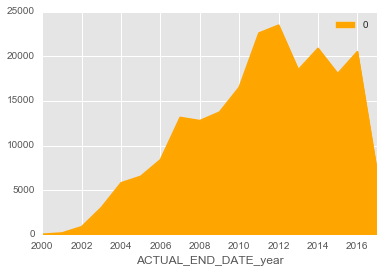

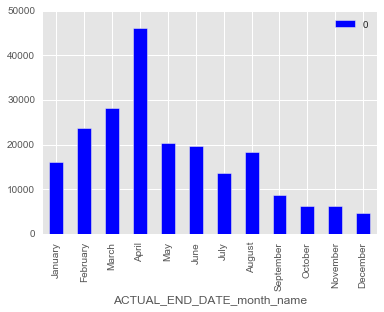

In [210]:
actual_date = ['ACTUAL_END_DATE']
create_date_charts(titlev_certs_flag, date_types, actual_date)

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


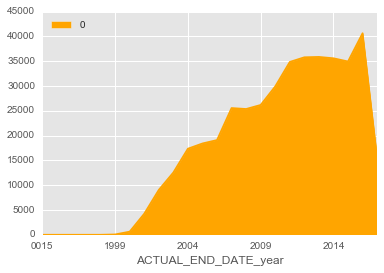

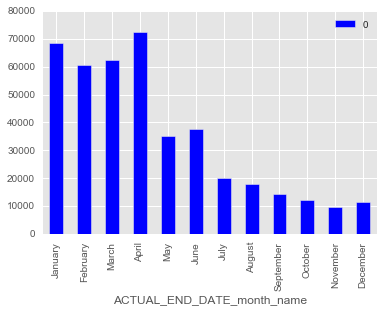

In [133]:
create_date_charts(titlev_certs_no_flag, date_types, actual_date)

In [201]:
df_violations_hpv = df_violations_hpv.join(hpv_years)

In [202]:
df_violations_frv = df_violations_frv.join(frv_years)

In [203]:
df_violations_frv.head()

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_year,EARLIEST_FRV_DETERM_DATE_month_name,EARLIEST_FRV_DETERM_DATE_month_num,FRV__1990,FRV__1991,FRV__1992,FRV__1994,FRV__1995,FRV__1997,FRV__1998,FRV__1999,FRV__2000,FRV__2001,FRV__2002,FRV__2003,FRV__2004,FRV__2005,FRV__2006,FRV__2007,FRV__2008,FRV__2009,FRV__2010,FRV__2011,FRV__2012,FRV__2013,FRV__2014,FRV__2015,FRV__2016,FRV__2017
1,CT0000000900700108,3400302043,State,CT,NaN,CT000A0000090070010800158,FRV,CAATVP,Title V Permits,300000282,NITROGEN OXIDES,05-24-2013,2013-05-24 00:00:00,2013,May,05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
126,NJ0000003400500008,3400304004,State,NJ,NaN,NJ000A0000340050000800146,FRV,CAASIP CAATVP,State Implementation Plan for National Primary...,300000330,OTHER,02-28-2006,2006-02-28 00:00:00,2006,February,02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162,NJ0000003403300066,3400303993,State,NJ,NaN,NJ000A0000340330006600077,FRV,CAANSPS CAASIP CAATVP,New Source Performance Standards State Impleme...,NaN,NaN,10-26-2005,2005-10-26 00:00:00,2005,October,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,NJ0000003400700306,3400304274,State,NJ,NaN,NJ000A0000340070030600069,FRV,CAASIP,State Implementation Plan for National Primary...,NaN,NaN,01-23-2001,2001-01-23 00:00:00,2001,January,01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
208,NJ0000003401555412,3400305054,State,NJ,NaN,NJ000A0000340155541200006,FRV,CAASIP,State Implementation Plan for National Primary...,300000330,OTHER,01-24-2003,2003-01-24 00:00:00,2003,January,01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
df_violations_hpv.head()

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,EARLIEST_FRV_DETERM_DATE_datetime,EARLIEST_FRV_DETERM_DATE_year,HPV_DAYZERO_DATE_datetime,HPV_DAYZERO_DATE_year,HPV_DAYZERO_DATE_month_name,HPV_DAYZERO_DATE_month_num,HPV_RESOLVED_DATE_datetime,HPV_RESOLVED_DATE_year,HPV_RESOLVED_DATE_month_name,HPV_RESOLVED_DATE_month_num,HPV__1975,HPV__1976,HPV__1978,HPV__1982,HPV__1983,HPV__1984,HPV__1985,HPV__1986,HPV__1987,HPV__1988,HPV__1989,HPV__1990,HPV__1991,HPV__1992,HPV__1993,HPV__1994,HPV__1995,HPV__1996,HPV__1997,HPV__1998,HPV__1999,HPV__2000,HPV__2001,HPV__2002,HPV__2003,HPV__2004,HPV__2005,HPV__2006,HPV__2007,HPV__2008,HPV__2009,HPV__2010,HPV__2011,HPV__2012,HPV__2013,HPV__2014,HPV__2015,HPV__2016,HPV__2017,HPV__2020
0,CT0000000900700108,3400302038,State,CT,NaN,CT000A0000090070010800028,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,05-28-1996,10-15-1996,NaN,NaN,1996-05-28,1996,May,05,1996-10-15,1996,October,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CT0000000900900110,3400302044,State,CT,NaN,CT000A0000090090011000026,HPV,CAASIP,State Implementation Plan for National Primary...,300000005 300000323,NITROGEN OXIDES NO2 POLLUTANT X,05-28-1996,10-15-1996,NaN,NaN,1996-05-28,1996,May,05,1996-10-15,1996,October,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CT0000000900900110,3400302045,State,CT,NaN,CT000A0000090090011000037,HPV,CAASIP,State Implementation Plan for National Primary...,10461 300000005,NITROGEN OXIDES NO2 Sulfur dioxide,08-21-1998,09-30-1999,NaN,NaN,1998-08-21,1998,August,08,1999-09-30,1999,September,09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CT0000000900300125,3400302055,State,CT,NaN,CT000A0000090030012500017,HPV,CAASIP,State Implementation Plan for National Primary...,300000242 300000329,FACIL TOTAL HAZARDOUS AIR POLLUTANTS (HAPS),07-12-2005,07-17-2007,NaN,NaN,2005-07-12,2005,July,07,2007-07-17,2007,July,07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CT0000000900508907,3400302093,State,CT,NaN,CT000A0000090050890700012,HPV,CAAFESOP,Federally-Enforceable State Operating Permit -...,300000329,FACIL,03-17-2010,11-02-2010,NaN,NaN,2010-03-17,2010,March,03,2010-11-02,2010,November,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
titlev_certs_flag = titlev_certs_flag.join(title_certs_flag_yrs)

titlev_certs_no_flag = titlev_certs_no_flag.join(titlev_certs_no_flag_yrs)


In [ ]:
title